In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## SciLit-Learn機器學習 

In [2]:
np.random.rand(6, 2)

array([[0.90663855, 0.53093754],
       [0.07840039, 0.28008713],
       [0.10406588, 0.07276143],
       [0.43957973, 0.86287055],
       [0.83453424, 0.08811156],
       [0.10169308, 0.34303328]])

In [3]:
x = np.random.rand(6)
y = np.random.rand(6)

In [4]:
x

array([0.96200503, 0.1678156 , 0.21082912, 0.64850052, 0.45260256,
       0.02311665])

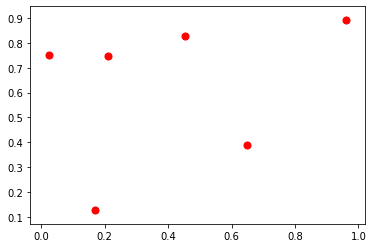

In [5]:
plt.scatter(x, y, c = "r", s = 50)

In [8]:
def myplot(n=1):
    plt.scatter(x, y, c = "r", s = 50)
    t = np.linspace(-0.2, 1.2, 1000)
    plt.plot(t, 0.5*np.sin(n*t) + 0.5)

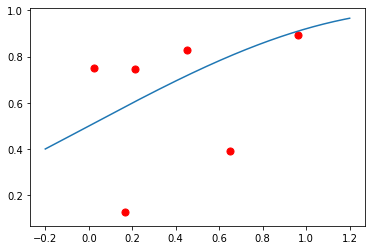

In [9]:
myplot(1)

In [10]:
from ipywidgets import interact

In [11]:
interact(myplot, n=(1, 200))

interactive(children=(IntSlider(value=1, description='n', max=200, min=1), Output()), _dom_classes=('widget-in…

<function __main__.myplot(n=1)>

## 線性迴歸

$$f(x) = 1.2x + 0.8 + \varepsilon$$

In [12]:
x = np.linspace(0, 5, 200)
y = 1.2*x + 0.8 + 0.3*np.random.randn(200)

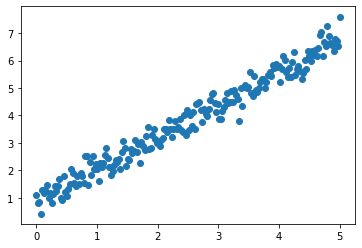

In [13]:
plt.scatter(x, y)

## 分訓練資料和測試資料

In [14]:
from sklearn.model_selection import train_test_split

#### 小重點

機器學習(數據分析), 輸入資料是
$$[x1,x2,x3,x4,...]$$

喜歡放成
$$[[x1],[x2],[x3],[x4],...]$$

本來n維向量, 要變成n*1

In [15]:
x.shape

(200,)

In [16]:
x = x.reshape(200, 1)

### 分 80%, 20%

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
len(x_train)

160

In [19]:
len(x_test)

40

### 準備做線性迴歸
所有函數學習，包括線性迴歸、機器學習、神經網路都是做三部曲

1. 開一台函數學習機
2. 訓練
3. 預測

#### step 1. 建函數學習機

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

#### step 2. 學習(訓練)

In [22]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### step 3. 預測

In [26]:
model.predict([[10]])

array([12.78355239])

In [24]:
model.predict([[10], [5]])

array([12.78355239,  6.80589735])

In [27]:
y_predict = model.predict(x_test)

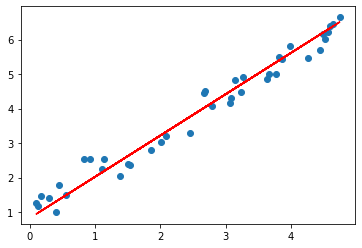

In [28]:
# 學出來的線
plt.scatter(x_test.ravel(), y_test)
plt.plot(x_test.ravel(), y_predict, "r")

## 房價預測

In [31]:
from sklearn.datasets import load_boston

In [32]:
boston_dataset = load_boston()

In [33]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [35]:
len(boston_dataset.feature_names)

13

In [36]:
boston_dataset.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [38]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [39]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [40]:
boston["MEDV"] = boston_dataset.target

In [41]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
# 讓matplotlib變漂亮
import seaborn as sns

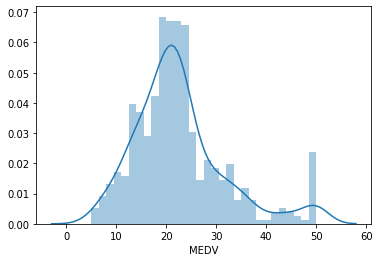

In [43]:
sns.distplot(boston.MEDV, bins=30)

## 準備資料訓練

In [46]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [47]:
X[:3]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00]])

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [50]:
len(x_train)

404

## 數據分析三部曲

In [49]:
model = LinearRegression()

In [51]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_predict = model.predict(x_test)

In [54]:
y_predict

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

## 用sns畫圖

In [56]:
sns.set()

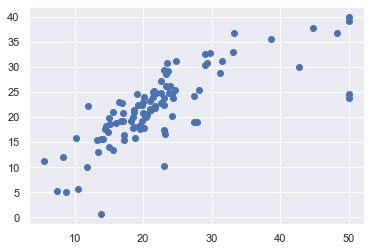

In [57]:
plt.scatter(y_test, y_predict)

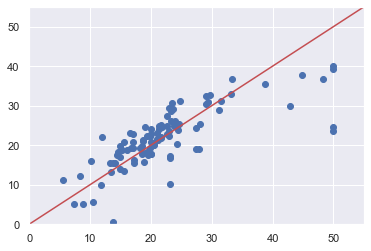

In [58]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55], [0,55], "r")

In [55]:
y_predict-y_test

329     2.289638
371   -26.278589
219     6.364999
403     3.822386
78      0.243823
         ...    
56      0.742171
455     1.471783
60     -0.762805
213    -2.794112
108     2.573233
Name: MEDV, Length: 102, dtype: float64

### [指定作業]

房價資料不用所有的feature去預測

In [60]:
x_train[87]

array([  5.58107,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.436  ,
        87.9    ,   2.3158 ,  24.     , 666.     ,  20.2    , 100.19   ,
        16.22   ])

In [61]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [62]:
correlation_matrix = boston.corr().round(2)

### 中文亂碼 改rc

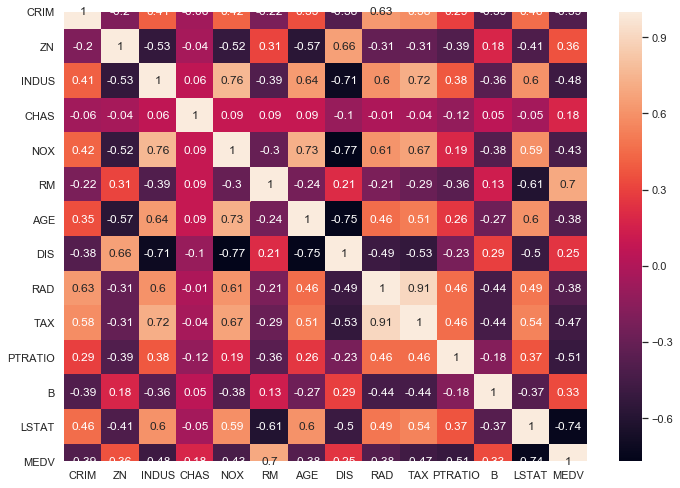

In [68]:
sns.set(rc = {"figure.figsize":(11.7, 8.27)})

sns.heatmap(correlation_matrix, annot = True)